<a href="https://colab.research.google.com/github/helymenezes/Colab/blob/CDPROM03/curva_saturacao_bateria_bms_100__chat_gpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESTUDO DE CASO BATERIA BMS _100_2

USANDO REGRESSÃO LOGÍSTICA


### Algoritmo Linear. O algoritmo de Regressão Logística assume que seus dados estão em uma Distribuição Normal para valores numéricos que podem ser modelados com classificação binária.

# PROBLEMA DE NEGÓCIO:

#### Problema de negócio, prever a curva de saturação da bateria.

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
# Importando bibliotecas que irei usar
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline


In [108]:
#carregamento de dados do datalogger
datalog_base = pd.read_csv(r'/content/drive/MyDrive/CURSO EAD/PROGRAMACAO/PYTHON/CIENICA DE DADOS/ESTUDO DE CASO/BATTERY_LIFE/ARQUIVOS.CSV/CONTROLADOR CO (120 DIAS)_cop.csv', sep = ',')


# Análise Exploratória dos dados









In [109]:
# Visualizando o dataset
datalog_base.head(3)

,,,,,Days Ago,Min Battery Volt.(V),Max Battery Volt.(V),Max Charge Curr.(A),Max Discharge Curr.(A),Max Charge Power(W),Max Discharge Power(W),Charge Ah,Discharge Ah,Charge KWh,Discharge KWh
120.0,26.0,2.0,28.0,5.0,34.0,21.0,0.0,0.0,944.0,0.0,111.0,0.0,3.0,63.0,0.0
119.0,26.0,7.0,28.0,5.0,32.0,47.0,0.0,0.0,899.0,0.0,82.0,0.0,2.0,268.0,0.0
118.0,26.0,4.0,28.0,5.0,32.0,89.0,0.0,0.0,901.0,0.0,107.0,0.0,2.0,968.0,0.0


In [110]:
#Realizando o tratamento do dataset com informações mais interessantes para avaliação.
datalog_base = datalog_base.reset_index()
datalog_base = datalog_base.set_index('level_0')
datalog_base = datalog_base.drop(['level_1','level_2','level_3','level_4','Max Battery Volt.(V)','Max Charge Curr.(A)','Max Charge Power(W)','Charge Ah','Discharge KWh'], axis=1)
datalog_base.head(3)



,Days Ago,Min Battery Volt.(V),Max Discharge Curr.(A),Max Discharge Power(W),Discharge Ah,Charge KWh
level_0,,,,,,
120.0,34.0,21.0,944.0,111.0,3.0,63.0
119.0,32.0,47.0,899.0,82.0,2.0,268.0
118.0,32.0,89.0,901.0,107.0,2.0,968.0


#### Apesar do estado de carga ser útil para determinar a confiabilidade do sistema
da bateria, é um parâmetro que não possuí uma forte correlação com a vida útil da bateria.
Sendo isto, um ponto vital para fazer uma estimativa de longo prazo da integridade da
bateria, uma vez que a capacidade é a principal indicação da integridade da bateria, que
irá diminuir com o tempo.
Formula soc = C atual / C carregado * 100% onde C_atual representa a capacidade da bateria em seu estado atual e C_carregado representa a capacidade da bateria em seu estado totalmente carregado (capacidade reversível).

#### O estado de saúde da bateria é outro importante parâmetro de avaliação de
uma bateria secundária, pois determina seu tempo de vida útil (números de ciclos) e
auxilia na manutenção dos sistemas eletrônicos abastecidos com estas baterias. O SOH
corresponde ao número de ciclos que a bateria recarregável ainda pode fornecer durante
sua vida útil. Pois, está diretamente ligado com a condição de saúde do sistema da bateria.
 A Forula SOH = C_carregado / C_nominal *100 onde C_nominal representa a capacidade nominal de fábrica, que pode desaparecer com o
tempo devido ao efeito do envelhecimento da bateria.
Os parâmetros C_full e C_nominal podem ser obtidas diretamente, e com baixo
erro, procedendo de um ciclo completo de carga e descarga da bateria. Normalmente, a
medida direta do SOH é realizada aplicando se um ciclo completo de carga e descarga na
baterias, e na etapa de descarga avalia-se a quantidade de carga disponível na bateria. A
desvantagem desse procedimento é o longo tempo, que pode levar de 4 a 6 horas, dependendo da corrente elétrica utilizada. O motivo dessa demora é que precisa determinar o
Cnominal. Para isso, o sistema deve estar próximo do equilíbrio termodinâmico. Por este
motivo, busca-se processos de medida indireta do SOH de uma bateria que reduzam o
tempo de análise com o máximo de confiabilidade.


In [115]:
datalog_base.columns
#Dia atrás - Days Ago
#Tensão mínima da bateria - Min Battery Volt.(V)
#Potência máxima de descarga - Max Discharge Curr.(A)
#Carregar KWh - Charge KWh

Index(['Days Ago', 'Min Battery Volt.(V)', 'Max Discharge Curr.(A)',
       'Max Discharge Power(W)', 'Discharge Ah', 'Charge KWh'],
      dtype='object')

In [6]:
# verificar a estrutura da tabela quantidade de colunas e linhas. (linhas, colunas)
datalog_base.shape

(121, 6)

In [ ]:
# Verificar valores ausentes (Missing)
datalog_base.isnull().sum() # avaliar valores nulos e soma-lo " indenficar informações nulos para excluir.(Valores missing ou valores ausentes)"

In [ ]:
#  "Eliminá-los" (neste caso não existe valores ausentes conforme informado na análise exploratória de dados, então não é preciso elimina-los)
datalog_base.dropna(inplace=True)
datalog_base.shape

In [ ]:
# Buscar informações e parâmetros dos dados (dtype)
datalog_base.info()

In [ ]:
datalog_base.nunique() #Nunique() apresenta o numero todad de VALORES UNICOS em cada coluna do dataframe.

In [ ]:
datalog_base.describe()# realização de informações estatítica para comparação média com a mediana.


In [ ]:
datalog_base.duplicated().sum # é a soma total de dados duplicados.

In [ ]:
data = datalog_base.drop_duplicates(subset=['Max Discharge Curr.(A)','Charge KWh'])
#data['Charge KWh'].duplicated().sum
data.shape

In [ ]:
data['Charge KWh'].value_counts()# Mostra quais valores são unicos.

In [ ]:
data.astype('float') # Convertendo para valores int64 para float

In [ ]:
#Calcular a correlação
datalog_corr = data.corr()
datalog_corr

In [ ]:
# Usando o método heatmap do seaborn

plt.figure(figsize=(16,6))
sns.heatmap(data=datalog_corr, annot=True)

### Usando Pandas profiling para avaliação geral.

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profiling = ProfileReport(datalog_base,title= 'Relatório - Pandas Profiling', html={'style':{'full_width':True}} )

In [ ]:
profiling
# Traducao das colunas do dataset
#  0   Days Ago / dias atrás
#  1   Min Battery Volt.(V)  /  Volt Mínimo Da Bateria (V)
#  2   Max Discharge Curr.(A) / Corrente de descarga máxima (A)
#  3   Max Discharge Power(W) / Potência máxima de descarga (W)
#  4   Discharge Ah / 4 Descarga Ah
#  5   Charge KWh / Carga KWh


### Criando Graficos manualmente sem o Pandas Profiling

## Usado gáficos matplotlib "px"

In [17]:
#Importar ploty
import plotly.express as px

In [ ]:
# Correlação entre Quantidade_ciclo x Carg
fig = px.scatter(data,x='Days Ago',y='Charge KWh')
fig.show()

In [ ]:
# Correlação entre descarga max(P) x Carga(Kw/h)
fig = px.scatter(data,x='Max Discharge Power(W)',y='Charge KWh')
fig.show()

In [ ]:
data['Charge KWh'].describe()

In [20]:
import plotly.figure_factory as ff


In [21]:
labels = ['Distribuição de variável  Max Discarga (Killo_watts)']
fig = ff.create_distplot([data['Charge KWh']],labels, bin_size= .2)
fig.show()

In [22]:
from scipy import stats
stats.skew(data['Charge KWh'])

0.29565762117093936

In [23]:
#Histograma da variável Charge Kwh
fig = px.histogram(data, x= "Max Discharge Curr.(A)", nbins=50, opacity=0.50)
fig.show()

In [25]:
#Visualizando outliers na Variável Carga
import plotly.express as px

fig = px.box(data, y='Charge KWh')
fig.update_layout(width= 800, height= 800)
fig.show()

In [26]:
datalog_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Days Ago to Charge KWh
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Days Ago                6 non-null      float64
 1   Min Battery Volt.(V)    6 non-null      float64
 2   Max Discharge Curr.(A)  6 non-null      float64
 3   Max Discharge Power(W)  6 non-null      float64
 4   Discharge Ah            6 non-null      float64
 5   Charge KWh              6 non-null      float64
dtypes: float64(6)
memory usage: 508.0+ bytes


## Usando gráficos Seanborn "sns"

In [ ]:
sns.pairplot(data)

In [ ]:
# estatistica descritivas de outras variáveis
data[['Min Battery Volt.(V)','Min Battery Volt.(V)','Max Discharge Curr.(A)','Max Discharge Power(W)','Discharge Ah']].describe()

,Min Battery Volt.(V),Min Battery Volt.(V),Max Discharge Curr.(A),Max Discharge Power(W),Discharge Ah
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,51.118644,51.118644,786.881356,89.237288,1.983051
std,28.656157,28.656157,299.664933,44.740762,1.224626
min,4.000000,4.000000,1.000000,0.000000,0.000000
25%,26.000000,26.000000,689.000000,58.000000,1.000000
50%,53.000000,53.000000,887.000000,103.000000,2.000000
75%,77.000000,77.000000,995.000000,122.000000,3.000000
max,95.000000,95.000000,1238.000000,154.000000,4.000000


# **Pré_Processamento de dados do dataset da bateria**


## Uso do codigo sugerido pelo chat gpt

In [49]:
import numpy as np

In [54]:
data.columns

Index(['Days Ago', 'Min Battery Volt.(V)', 'Max Discharge Curr.(A)',
       'Max Discharge Power(W)', 'Discharge Ah', 'Charge KWh'],
      dtype='object')

In [74]:
#Usando somente uma variável
X = np.array(data['Charge KWh']).reshape(-1, 1)
Y = np.array(data['Days Ago'])

### Importando Bibliotecas

In [28]:
# Importando bibliotecas
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [43]:
array = data.values

In [44]:
#  Separando o array em componentes de input e output
X = array[:,0:3]
Y = array[:,5]


In [ ]:
X

### Pré Processamento com Padronizão



In [ ]:
# Gerando o novo padrão
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)

In [ ]:
standardX

### Pré Processamento com Normalização

In [ ]:
# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)


In [ ]:
rescaledX

### Separando dados  para regressão linear Multinear


In [91]:
# Coletando x e y
# Usaremos como variáveis explanatórias somente as 4 variáveis mais relevantes
X = datalog_base[['Charge KWh','Max Discharge Power(W)','Max Discharge Curr.(A)']]
y = datalog_base['Days Ago'].values

In [92]:
#Realizar a separação dos dados dataset entre 80% treino e e 20% para validação.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# **Criação da Máquina preditiva**




### Uso do codigo Sugerido pelo chat gpt

In [75]:
#Criar modelo
model = LinearRegression()
#treinar modelo
model.fit(X,Y)

LinearRegression()

In [82]:
# Fazer uma previsão para um novo valor de ciclos
novo_ciclo = np.array([[10000]])  # Coloque o valor do novo ciclo aqui
predicao = model.predict(novo_ciclo)

print("A previsão de saturação da bateria para", novo_ciclo[0][0], "ciclos é:", predicao[0])

A previsão de saturação da bateria para 10000 ciclos é: 98.30953871130289


### Criando um modelo de maquina preditiva de regressão múltipla

In [93]:
#Construindo o modelo de Regreção mútipla
model = LinearRegression()


In [94]:
#Treina o modelo
model_multi = model.fit(X_train, y_train)

In [102]:
# Novas Previsões
prevision = model_multi.predict(X_test)
prevision

array([32.99605622, 23.54663889, -0.60599468, 41.94233444, 36.79911596,
       34.72978294, 37.54631734, 17.07585025, 22.5475437 , 35.2608156 ,
       35.94766434, 32.70730601])

# Avaliando o desempenho da máquina preditiva Simples e Multipla

### Avaliando a acurácia do codigo chat gpt indicado

In [103]:
# Evaluate model - Avaliação da Acurácia do Modelo
print('Acurácia: %.2f' % (model.score(X_test,y_test)*100), '%' )

Acurácia: 99.69 %


# Decorrente a correlação entre ciclos de cargas mais as variáveis
Charge KWh
Max Discharge Power(W)
Max Discharge Curr.(A)
Pode se dizer que a bateria saturou por alguma ocasião no ciclo 02;
Havendo uma previsão de falha no sétimo ciclo, sendo que uma ação corretiva foi realizada para conter a descarga profunda da bateria.

# SALVANDO DADOS EM EXCEL PARA AVALIAR EM PLANILHA.


In [ ]:
dataframe_excel = pd.ExcelWriter(r'/content/drive/MyDrive/CURSO EAD/PROGRAMACAO/PYTHON/CIENICA DE DADOS/ESTUDO DE CASO/BATTERY_LIFE/data.xlsx')
data.to_excel(dataframe_excel)
dataframe_excel.save()



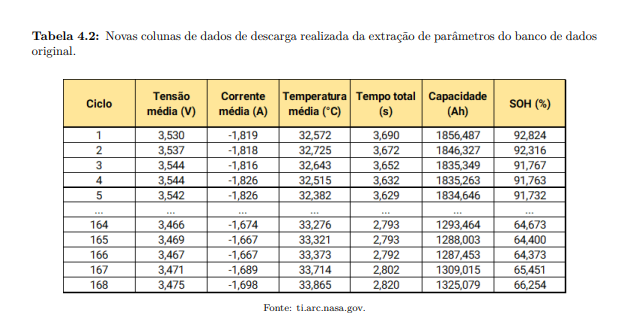

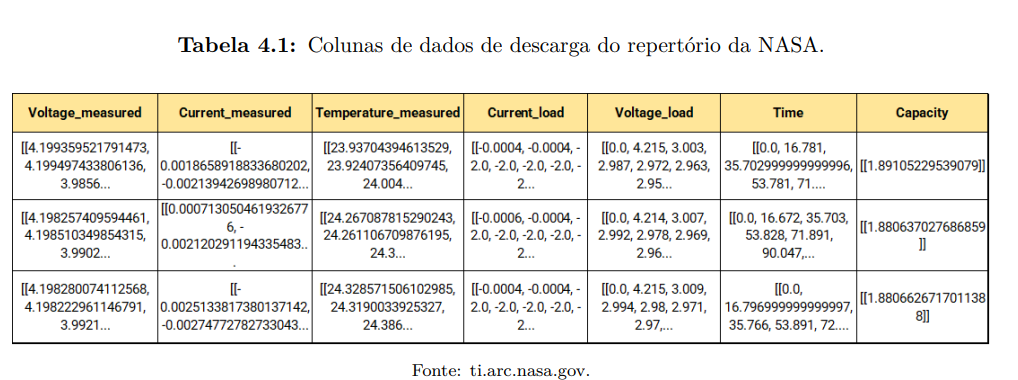
